### Import Required Libraries

In [1]:
import numpy as np
import pickle
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from RBFN import *

### Assignment-specific functions

In [2]:
# -------------------------------------------------------------------------------------------------
#               Class - to group together assignment-specific functions
# -------------------------------------------------------------------------------------------------
class assignment ():
    def __init__ (self, center_methods, spreads, test_validation_division = 9/10):
        self.center_methods = center_methods
        self.spreads = spreads
        self.test_validation_division = test_validation_division

        self.test_input_set = None
        self.validation_input_set = None
        self.test_label_set = None
        self.validation_label_set = None

    
    def generate_input_data (self):
        # Input to the Network
        training_input = np.empty([21, 21, 2], dtype = float)
        training_label = np.empty([21, 21], dtype = float)

        for i in range(len(training_input)):
            for j in range(len(training_input[0])):
                training_input[i, j] = np.array([-2 + (0.2 * i), -2 + (0.2 * j)])

                if (np.power(training_input[i, j, 0], 2) + np.power(training_input[i, j, 1], 2)) <= 1:
                    training_label[i, j] = 1
                else:
                    training_label[i, j] = -1

        training_input = np.array(training_input.reshape(len(training_input) * len(training_input[0]), 2))
        training_label = np.array([training_label.reshape(len(training_label) * len(training_label[0]))]).T

        # Split the data into test and validation sets        
        self.test_input_set, self.validation_input_set, self.test_label_set, self.validation_label_set = train_test_split(training_input, training_label, test_size=(1 - self.test_validation_division), random_state=40)


    def train_and_observe (self):
        # Train the network for different configurations and compare them
        config, plot = pyplot.subplots(3, 3)
        config.set_size_inches(3* 7, 3 * 7)

        x = 0
        results = []
        for cm in self.center_methods:
            track_progress = np.empty([len(self.spreads), 4])

            centers = len(self.test_input_set)
            if cm in ["Random Inputs", "K-Means"]:
                centers = 150

            print("\n\n\n----------------------------------------------------------------------------------------------------------------")
            print("\t\t\t Centers are found using - " + cm + " and with " + str(centers) + " neurons in the hidden layer")
            print("----------------------------------------------------------------------------------------------------------------")

            for i in range(len(self.spreads)):
                # Train the network
                rbf = RBF_Neural_Nw(size_input_features = 2, size_hidden = centers, size_out = 1, radial_function = "Gaussian Kernel", loss_function = "Mean Square Error", spread = self.spreads[i], center_method = cm)
                loss, accuracy_predictions_test, accuracy_predictions_valid = rbf.build_Model(self.test_input_set, self.validation_input_set, self.test_label_set, self.validation_label_set)

                track_progress[i] = [self.spreads[i], loss, accuracy_predictions_test, accuracy_predictions_valid]
            
            results.append(track_progress)

            plot[x, 0].set_title("Centers are found using - " + cm + " and with " + str(centers) + " neurons in the hidden layer")
            plot[x, 0].set_xlabel("Spread")
            plot[x, 0].set_ylabel("MSE")
            plot[x, 0].plot(track_progress.T[0], track_progress.T[1])
            # plot[x, 0].set_show()

            plot[x, 1].set_xlabel("Spread")
            plot[x, 1].set_ylabel("Training Accuracy")
            plot[x, 1].plot(track_progress.T[0], track_progress.T[2])
            # plot[x, 1].set_show()

            plot[x, 2].set_xlabel("Spread")
            plot[x, 2].set_ylabel("Validation Accuracy")
            plot[x, 2].plot(track_progress.T[0], track_progress.T[3])
            # plot[x, 2].show()

            x += 1

        pyplot.show()


        # Plot cumulative Graph
        config_cum, plot_cum = pyplot.subplots(1, 3)
        config_cum.set_size_inches(3 * 8, 7)

        plot_cum[0].set_xlabel("Spread")
        plot_cum[0].set_ylabel("MSE")

        plot_cum[1].set_xlabel("Spread")
        plot_cum[1].set_ylabel("Training Accuracy")

        plot_cum[2].set_xlabel("Spread")
        plot_cum[2].set_ylabel("Validation Accuracy")

        for i in range(len(results)):
            plot_cum[0].plot(results[i].T[0], results[i].T[1])
            plot_cum[1].plot(results[i].T[0], results[i].T[2])
            plot_cum[2].plot(results[i].T[0], results[i].T[3])

        pyplot.figlegend(['Centers = Input', 'Centers = 150 Random inputs', 'Centers = 150 K-Means'], loc='upper left')
        pyplot.show()
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------



# Train and observe the Network




----------------------------------------------------------------------------------------------------------------
			 Centers are found using - Input and with 352 neurons in the hidden layer
----------------------------------------------------------------------------------------------------------------


			 Spread = 0.1
	-----------------------------------------------------
	Mean Square Error:		6.413696883890293e-30
	Accuracy of Test Set: 		100.0
	Accuracy of Validation Set:	94.3820224719101


			 Spread = 0.25
	-----------------------------------------------------
	Mean Square Error:		6.604146716701416e-19
	Accuracy of Test Set: 		100.0
	Accuracy of Validation Set:	91.01123595505618


			 Spread = 0.5
	-----------------------------------------------------
	Mean Square Error:		0.02489426870950886
	Accuracy of Test Set: 		100.0
	Accuracy of Validation Set:	91.01123595505618


			 Spread = 1
	-----------------------------------------------------
	Mean Square Error:		0.0558956983773726

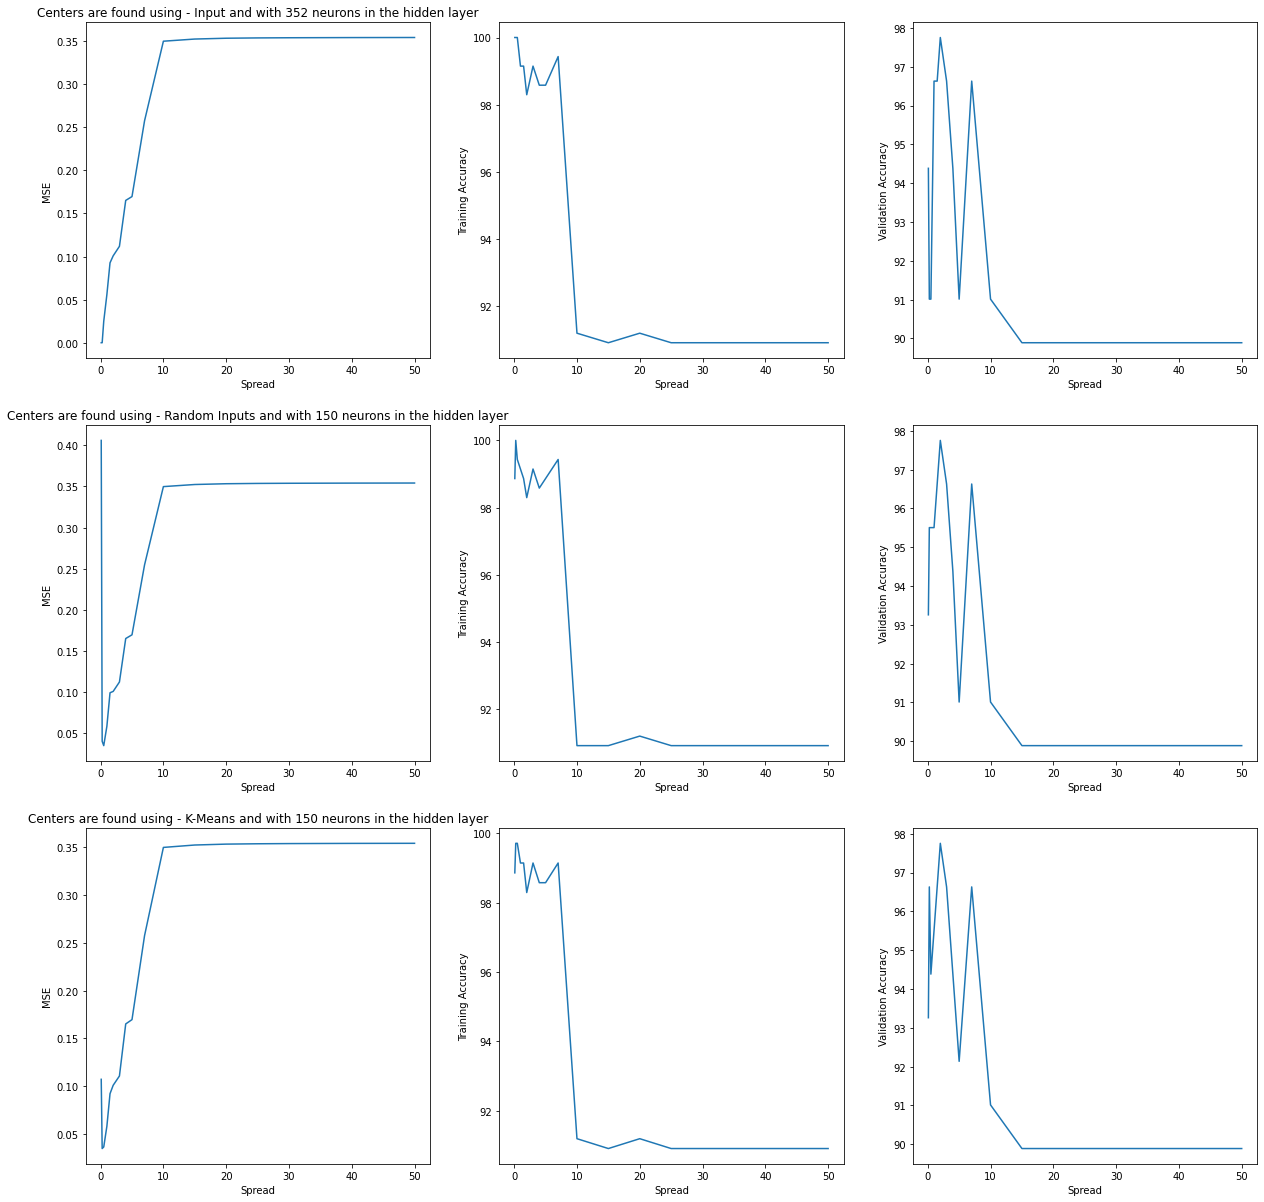

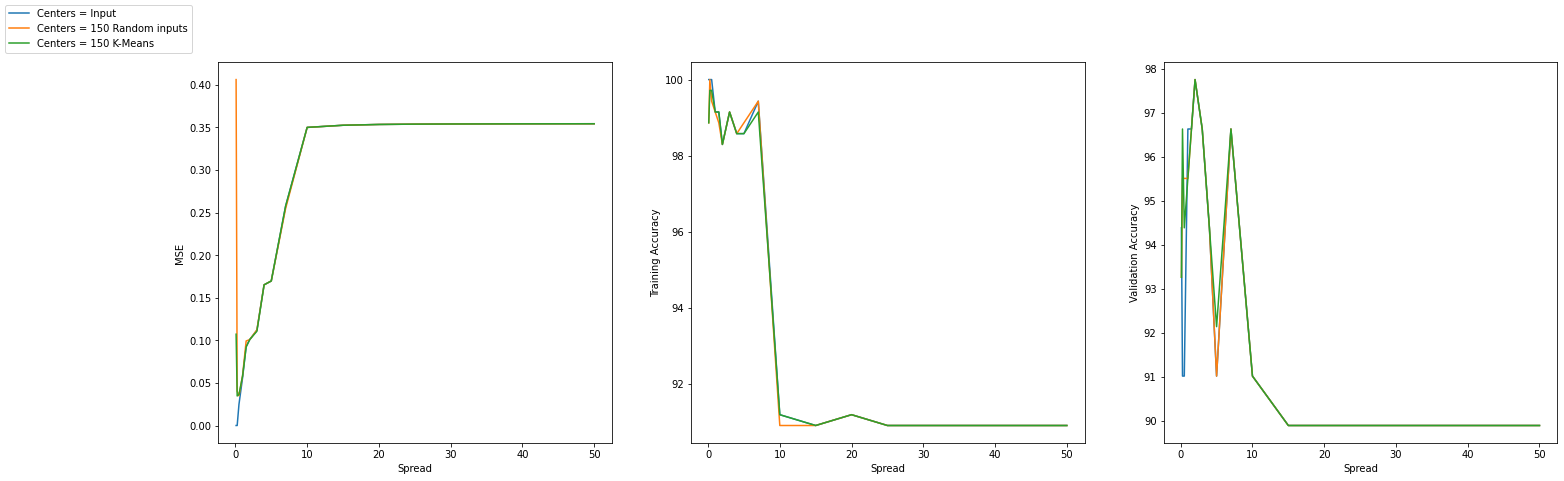

In [3]:
# -------------- Prepare Input Data for the network -----------------
a = assignment(center_methods = ["Input", "Random Inputs", "K-Means"], spreads = [0.1, 0.25, 0.5, 1, 1.5, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30, 40, 50], test_validation_division = 8/10)
a.generate_input_data()
a.train_and_observe()

#### Class Example

In [4]:
# test_input_set = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype = float)
# test_label_set = np.array([-1, 1, 1, -1], dtype = float)

# rbf = RBF_Neural_Nw(size_input_features = 2, size_hidden = 2, size_out = 1, radial_function = "Gaussian Kernel", loss_function = "Mean Square Error", spread = 1, center_method = "Class Example")
# loss, accuracy_predictions_test, accuracy_predictions_valid = rbf.build_Model(test_input_set, test_input_set, test_label_set, test_label_set)

# print(rbf.G)
# print(rbf.weights)
# print(rbf.actual_out)
